In [1]:
# Example of kNN implemented from Scratch in Python

import csv
import random
import math
import operator
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import some data to play with
# iris = datasets.load_iris()
# dataset=iris
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


df=pd.read_csv('C:/Users/Abhi/Desktop/data science/IRIS.csv',header=None, names=names)


In [2]:

df.head()

,,,,sepal_length,sepal_width,petal_length,petal_width,class
5.1,0.222222,3.5,0.625000,1.4,0.067797,0.2,0.041667,setosa
4.9,0.166667,3.0,0.416667,1.4,0.067797,0.2,0.041667,setosa
4.7,0.111111,3.2,0.500000,1.3,0.050847,0.2,0.041667,setosa
4.6,0.083333,3.1,0.458333,1.5,0.084746,0.2,0.041667,setosa
5.0,0.194444,3.6,0.666667,1.4,0.067797,0.2,0.041667,setosa


In [3]:
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split

# create design matrix X and target vector y
X = np.array(df.ix[:, 0:4]) 	# end index is exclusive
y = np.array(df['class']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Abhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [4]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
#print (accuracy_score(y_test, pred))

In [5]:
print(pred)

['virginica' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'versicolor']


In [6]:
import collections
def train(X_train, y_train):
    # do nothing
    return

In [7]:
def predict(X_train, y_train, x_test, k):
    # first we compute the euclidean distance
    distances = [
        [np.sqrt(np.sum(np.square(x_test - x_train))), i] 
        for i, x_train in enumerate(X_train)
    ]
        
    # sort the list
    distances = sorted(distances)
    
    # make a list of the k neighbors' targets
    targets = [y_train[distance[1]] for distance in distances[:k]]
        
    # return most common target
    return collections.Counter(targets).most_common(1)[0][0]


In [8]:
def k_nearest_neighbour(X_train, y_train, X_test, k):
    # train on the input data
    train(X_train, y_train)
    
    # loop over all observations
    return [predict(X_train, y_train, x_test, k) for x_test in X_test]

In [9]:
# making our predictions 
pred = k_nearest_neighbour(X_train, y_train, X_test, 1)

# transform the list into an array
pred = np.asarray(pred)

# # evaluating accuracy
# accuracy = accuracy_score(y_test, pred)
# print('\nThe accuracy of our classifier is {}'.format(accuracy))

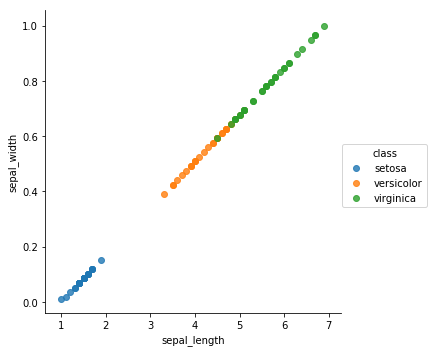

In [10]:
sns.lmplot('sepal_length', 'sepal_width', data=df, hue='class', fit_reg=False)
plt.show()

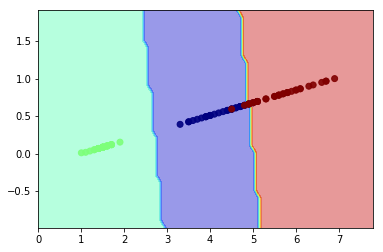

In [11]:
def label_to_int(labels):
    return [list(set(labels)).index(y_value) for y_value in labels]

# use color map, otherwise it will be grayscale
from matplotlib import cm

# choose 2 features to classify
features_indexes = [0,1]

# Plotting decision regions
x_min, x_max = X[:, features_indexes[0]].min() - 1, X[:, features_indexes[0]].max() + 1
y_min, y_max = X[:, features_indexes[1]].min() - 1, X[:, features_indexes[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train[:, features_indexes], y_train)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(label_to_int(Z))
Z = Z.reshape(xx.shape)

# TODO: try to use seaborn instead 
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cm.jet)
plt.scatter(X[:, features_indexes[0]], X[:, features_indexes[1]], c=[list(set(y)).index(y_value) for y_value in y], alpha=0.9, cmap=cm.jet)
plt.show()